In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
mpl.rc('figure', figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1,
               rc={"lines.linewidth": 2})
plot_params = {"style": '.-',
              "color": "0.75",
              "markeredgecolor":"0.25",
              "markerfacecolor":"0.25"}

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [5]:
! ls input

j0002_X_test.csv j0002_train.csv


In [27]:
seed = 42

# Load Data

In [8]:
data_dir = Path('input')
train_data = pd.read_csv(data_dir / 'j0002_train.csv')
test_data = pd.read_csv(data_dir / 'j0002_X_test.csv')
train_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [9]:
test_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [10]:
print(train_data.shape, test_data.shape)

(2100, 7) (900, 6)


# Data Expl

In [60]:
X = train_data.copy()
X_test = test_data.copy()
y = X.pop('target')

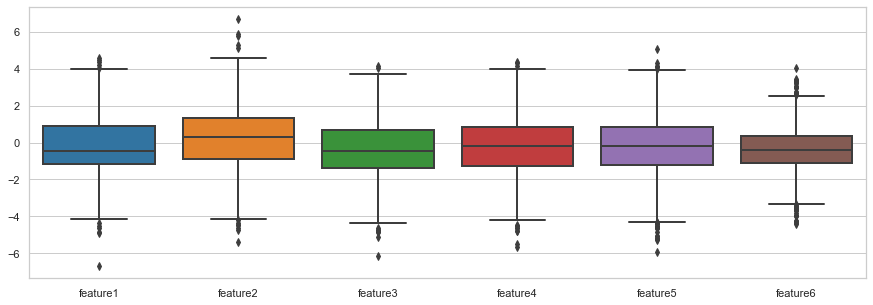

<AxesSubplot:>

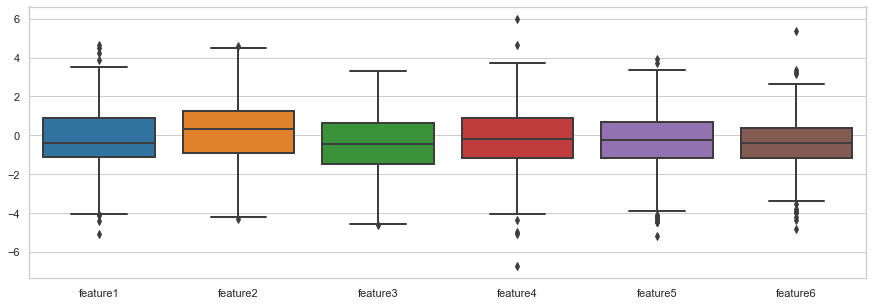

In [17]:
sns.boxplot(data=X)
plt.show()
sns.boxplot(data=test_data)

In [63]:
display(train_data.describe())
display(test_data.describe())

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


,feature1,feature2,feature3,feature4,feature5,feature6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


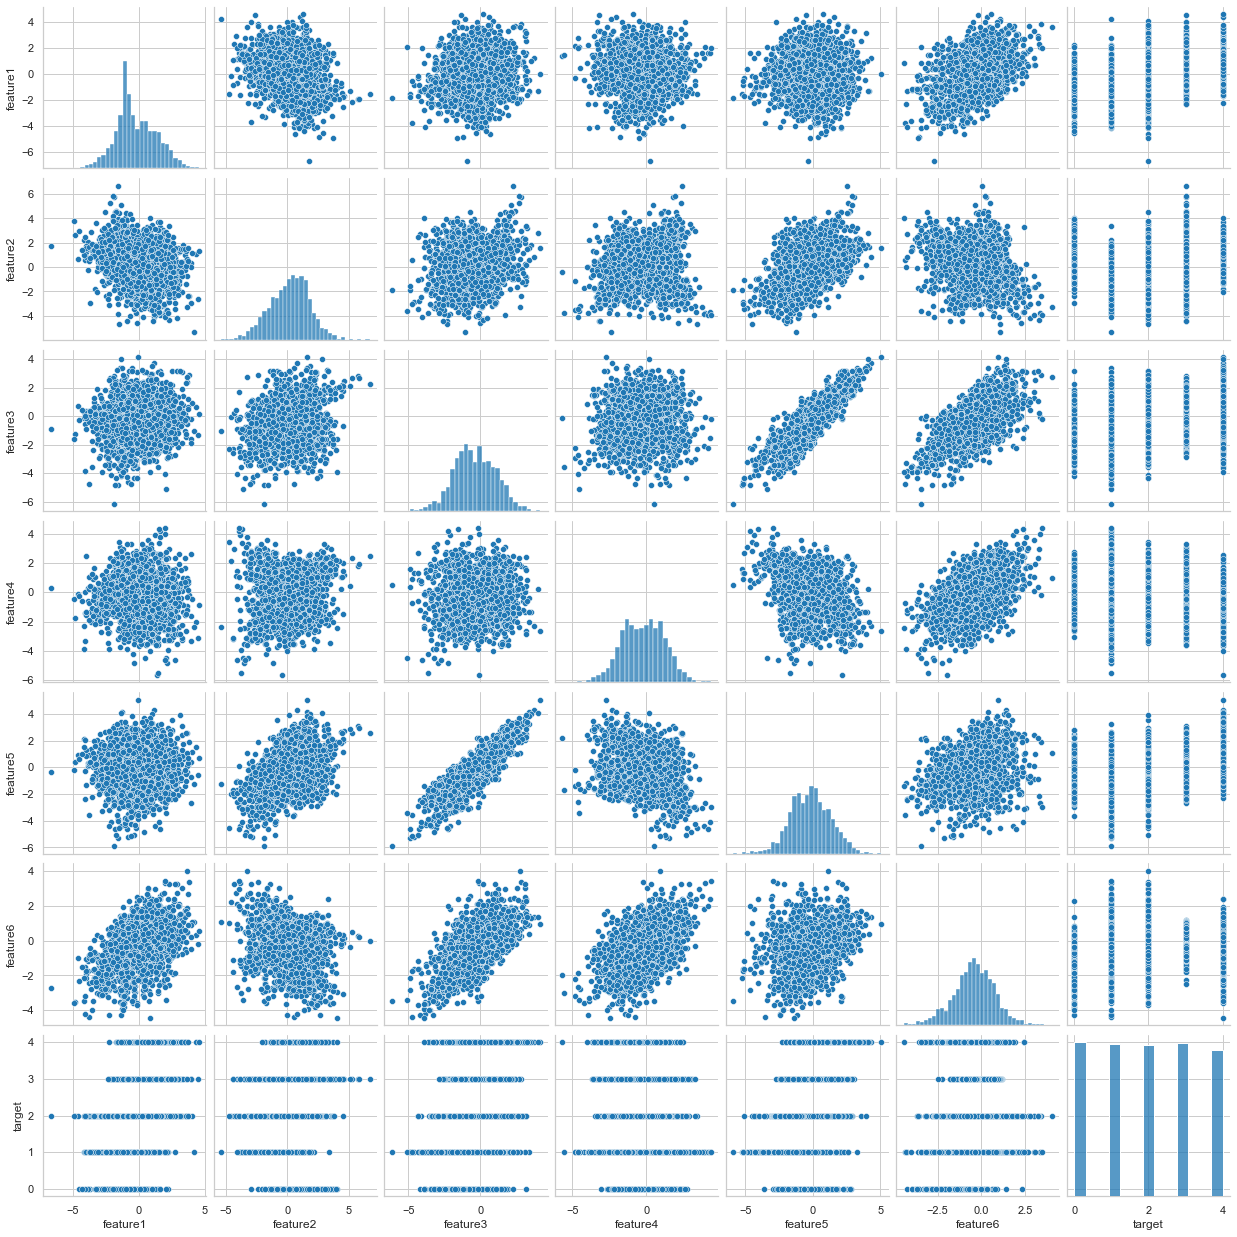

In [62]:
sns.pairplot(train_data)

In [64]:
feat = 'feature1'

<AxesSubplot:xlabel='target', ylabel='feature1'>

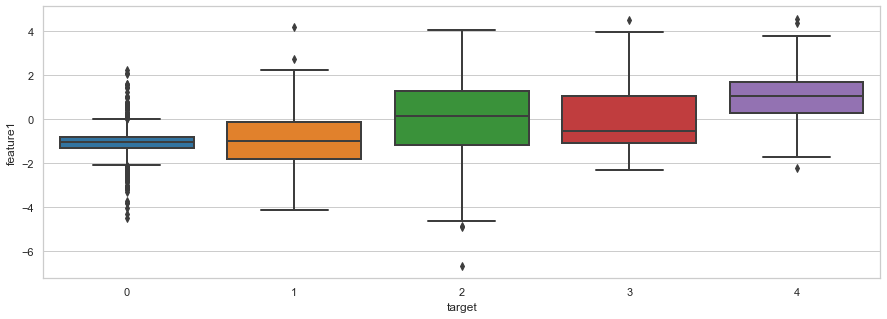

In [66]:
sns.boxplot(data=train_data, y=feat, x='target')

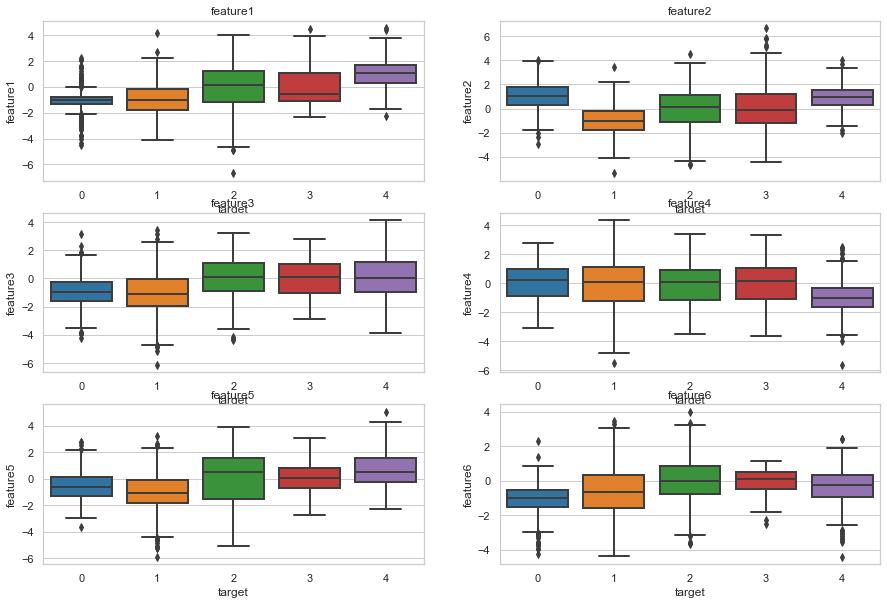

In [74]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
for i, feat in enumerate(X.columns):
    ax = axs.flat[i]
    sns.boxplot(data=train_data, y=feat, x='target', ax=ax)
    ax.set_title(feat)

# Model Selection

In [28]:
model = RandomForestClassifier(random_state=seed)

In [30]:
cross_val_score(model, X, y)

array([0.76904762, 0.76904762, 0.79047619, 0.78333333, 0.7547619 ])

In [24]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
param_grid = {'max_depth': [3, 4, 5, 6, 8, 10, 20, None],
                'max_features': [2, 4, 'auto'],
                'n_estimators': [10, 50, 100]}

In [36]:
clf = GridSearchCV(model, param_grid=param_grid, verbose=2)

In [37]:
clf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 20, None],
                         'max_features': [2, 4, 'auto'],
                         'n_estimators': [10, 50, 100]})

In [42]:
results = pd.DataFrame(clf.cv_results_)[['rank_test_score','param_max_depth', 'param_max_features', 'param_n_estimators', 'params','mean_test_score','std_test_score']]
results.columns

Index(['rank_test_score', 'param_max_depth', 'param_max_features',
       'param_n_estimators', 'params', 'mean_test_score', 'std_test_score'],
      dtype='object')

In [43]:
results = results.set_index('rank_test_score').sort_index()
results

,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,20,auto,100,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.774286,0.011800
1,20,2,100,"{'max_depth': 20, 'max_features': 2, 'n_estima...",0.774286,0.011800
3,10,4,100,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.773810,0.007825
4,None,2,100,"{'max_depth': None, 'max_features': 2, 'n_esti...",0.773333,0.012454
4,None,auto,100,"{'max_depth': None, 'max_features': 'auto', 'n...",0.773333,0.012454
...,...,...,...,...,...,...
68,3,auto,10,"{'max_depth': 3, 'max_features': 'auto', 'n_es...",0.629048,0.013669
68,3,2,10,"{'max_depth': 3, 'max_features': 2, 'n_estimat...",0.629048,0.013669
70,3,4,100,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",0.610952,0.011228


<AxesSubplot:xlabel='rank_test_score'>

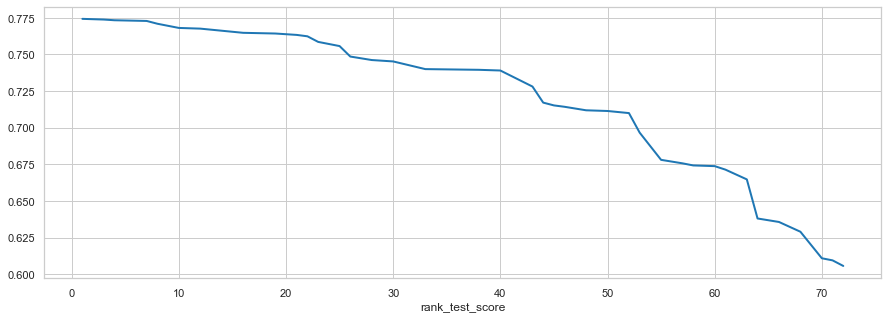

In [44]:
results.mean_test_score.plot()

In [45]:
results.head(7)

,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,20,auto,100,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.774286,0.011800
1,20,2,100,"{'max_depth': 20, 'max_features': 2, 'n_estima...",0.774286,0.011800
3,10,4,100,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.773810,0.007825
4,None,2,100,"{'max_depth': None, 'max_features': 2, 'n_esti...",0.773333,0.012454
4,None,auto,100,"{'max_depth': None, 'max_features': 'auto', 'n...",0.773333,0.012454
4,None,4,50,"{'max_depth': None, 'max_features': 4, 'n_esti...",0.773333,0.016176
7,20,4,50,"{'max_depth': 20, 'max_features': 4, 'n_estima...",0.772857,0.016190


<AxesSubplot:xlabel='rank_test_score'>

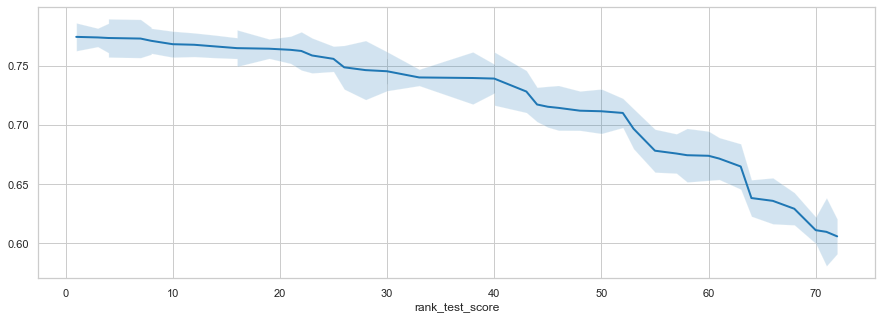

In [51]:
plt.fill_between(results.index, 
                 results.mean_test_score-results.std_test_score, 
                 results.mean_test_score+results.std_test_score,
                alpha=.2)
results.mean_test_score.plot()

<AxesSubplot:xlabel='rank_test_score'>

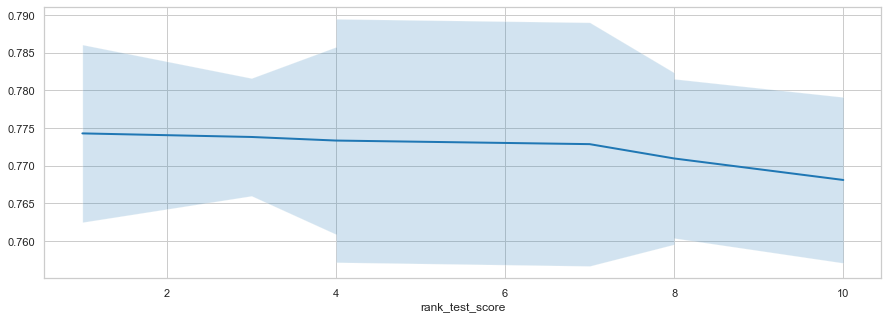

In [53]:
results = results.head(10)
plt.fill_between(results.index, 
                 results.mean_test_score-results.std_test_score, 
                 results.mean_test_score+results.std_test_score,
                alpha=.2)
results.mean_test_score.plot()

In [54]:
results

,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score
rank_test_score,,,,,,
1,20,auto,100,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.774286,0.011800
1,20,2,100,"{'max_depth': 20, 'max_features': 2, 'n_estima...",0.774286,0.011800
3,10,4,100,"{'max_depth': 10, 'max_features': 4, 'n_estima...",0.773810,0.007825
4,None,2,100,"{'max_depth': None, 'max_features': 2, 'n_esti...",0.773333,0.012454
4,None,auto,100,"{'max_depth': None, 'max_features': 'auto', 'n...",0.773333,0.012454
4,None,4,50,"{'max_depth': None, 'max_features': 4, 'n_esti...",0.773333,0.016176
7,20,4,50,"{'max_depth': 20, 'max_features': 4, 'n_estima...",0.772857,0.016190
8,None,4,100,"{'max_depth': None, 'max_features': 4, 'n_esti...",0.770952,0.011409
8,20,4,100,"{'max_depth': 20, 'max_features': 4, 'n_estima...",0.770952,0.010584


In [55]:
best_params = results.params[3]
best_params

{'max_depth': 10, 'max_features': 4, 'n_estimators': 100}

In [57]:
model = RandomForestClassifier(**best_params, random_state=seed)
model

RandomForestClassifier(max_depth=10, max_features=4, random_state=42)

# Make Prediction

In [58]:
model.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=4, random_state=42)

In [61]:
y_pred = model.predict(X_test)

In [78]:
pd.Series(y_pred).to_csv("results.csv")

In [80]:
! ls

RandomForest_LGM.ipynb input
info.txt               results.csv
